In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [64]:
#Define a function that calculates and plots a linear regression for specified data
#Augmented code written in the WeatherPy assignment

def plot_linearregression(x_values, y_values, x_label, y_label, county, annotation_loc):
    #clear previous graph
    plt.clf()
    # Create a linear regression model and fit it to your x and actual y values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # Calculate the predicted y values using the equation of a line
    predicted_y = slope*x_values + intercept
    # Create a string of the line equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    # Generate a scatter plot for your x and actual y values
    plt.scatter(x_values, y_values)
    # Generate a line for your x and predicted y values
    plt.plot(x_values, predicted_y, color = 'r')
    # Create an annotation that shows the line equation string at annotation_loc
    #plt.annotate(line_eq, annotation_loc, color = 'r')
    # Add an x label and y label (y_label was a string input for this function)
    plt.title(f'{x_label} Vs. {y_label} for {county}')
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')

    plt.savefig('test_1.png')
    #plt.savefig(f"/results/{x_label}_vs_{y_label}_{county}_reg.png")

    

   

In [46]:
#Read in csv file for top five counties and display dataframe

top_five_df = pd.read_csv('resources/top_five_counties.csv')

#Rename price(dollars/unit) to price (dollars/ton) and delete unit column
top_five_df.rename(columns = {'Yield(Unit/Acre)': 'Yield(Ton Per Acre)', 'Price(Dollars/Unit)': 'Price(Dollars Per Ton)'}, inplace = True)

#Drop Unit column
top_five_df.drop(columns = ['Unit'], inplace = True)

top_five_df

,Year,County,HarvestedAcres,Yield(Ton Per Acre),Production,Price(Dollars Per Ton),Value(Dollars)
0,2020,Marin,195.0,1.33,260.0,3607.69,938000
1,2020,Napa,45200.0,2.20,99300.0,4646.48,461395000
2,2020,Placer,315.0,2.79,879.0,2235.49,1965000
3,2020,SantaCruz,670.0,2.39,1600.0,3008.75,4814000
4,2020,Sonoma,56800.0,2.61,148000.0,2375.08,351512000
...,...,...,...,...,...,...,...
163,1982,Sonoma,24746.0,4.00,98979.0,565.00,55910300
164,1981,Napa,22152.0,3.62,80155.0,732.00,58659000
165,1981,Sonoma,23776.0,3.39,80675.0,590.00,47626000
166,1980,Napa,22261.0,3.60,80112.0,622.00,49863000


In [42]:
#Check number of years present for each county
top_five_df.groupby('County').count()

,Year,HarvestedAcres,Yield(Ton/Acre),Production,Price(Dollars/Ton),Value(Dollars)
County,,,,,,
Marin,22,22,22,22,22,22
Napa,41,41,41,41,41,41
Placer,28,28,28,28,28,28
SantaCruz,36,36,36,36,36,36
Sonoma,41,41,41,41,41,41


In [4]:
#Read in csv file for merged weather and display dataframe

merged_weather_df = pd.read_csv('resources/merged_weather.csv')
merged_weather_df.head()

,Name,Avg. Temp,Min. Temp,Max. Temp,Precip.,month,year
0,Marin,51.5,43.2,59.7,2.83,December,2020
1,Marin,53.5,44.2,62.8,1.54,November,2020
2,Marin,66.2,54.4,78.0,0.01,October,2020
3,Marin,66.8,56.7,77.0,0.00,September,2020
4,Marin,66.7,56.4,77.1,0.25,August,2020


In [39]:
#Read in csv file for yearly weather data and display dataframe 
yearly_weather_df = pd.read_csv('resources/yearly_weather_data.csv')
yearly_weather_df

,year,Name,Min. Temp,Max. Temp,Precip.,Temp Range
0,1980,Marin,42.8,71.5,31.06,28.7
1,1981,Marin,44.4,76.6,43.27,32.2
2,1982,Marin,38.1,72.4,54.25,34.3
3,1983,Marin,41.9,75.7,73.85,33.8
4,1984,Marin,40.5,78.2,27.09,37.7
...,...,...,...,...,...,...
200,2016,Sonoma,40.0,79.1,40.44,39.1
201,2017,Sonoma,37.7,83.1,47.63,45.4
202,2018,Sonoma,37.9,81.2,27.33,43.3
203,2019,Sonoma,39.6,82.9,46.24,43.3


In [47]:
#Merge yearly weather and wine data 
merged_df = top_five_df.merge(yearly_weather_df, how = 'inner', left_on = ['Year', 'County'], right_on = ['year', 'Name'])

merged_df.drop(columns = ['year', 'Name'], inplace = True)

merged_df

,Year,County,HarvestedAcres,Yield(Ton Per Acre),Production,Price(Dollars Per Ton),Value(Dollars),Min. Temp,Max. Temp,Precip.,Temp Range
0,2020,Marin,195.0,1.33,260.0,3607.69,938000,43.2,78.0,13.07,34.8
1,2020,Napa,45200.0,2.20,99300.0,4646.48,461395000,38.1,92.7,10.32,54.6
2,2020,Placer,315.0,2.79,879.0,2235.49,1965000,31.9,88.6,24.95,56.7
3,2020,SantaCruz,670.0,2.39,1600.0,3008.75,4814000,38.7,82.5,14.51,43.8
4,2020,Sonoma,56800.0,2.61,148000.0,2375.08,351512000,38.7,82.5,14.51,43.8
...,...,...,...,...,...,...,...,...,...,...,...
163,1982,Sonoma,24746.0,4.00,98979.0,565.00,55910300,34.9,77.6,54.26,42.7
164,1981,Napa,22152.0,3.62,80155.0,732.00,58659000,40.4,90.4,37.47,50.0
165,1981,Sonoma,23776.0,3.39,80675.0,590.00,47626000,41.5,80.6,35.89,39.1
166,1980,Napa,22261.0,3.60,80112.0,622.00,49863000,37.7,88.1,31.43,50.4


In [52]:
for i in merged_df[['HarvestedAcres', 'Yield(Ton Per Acre)', 'Production',
       'Price(Dollars Per Ton)', 'Value(Dollars)', 'Min. Temp', 'Max. Temp',
       'Precip.', 'Temp Range']].columns:
    print(i)


HarvestedAcres
Yield(Ton Per Acre)
Production
Price(Dollars Per Ton)
Value(Dollars)
Min. Temp
Max. Temp
Precip.
Temp Range


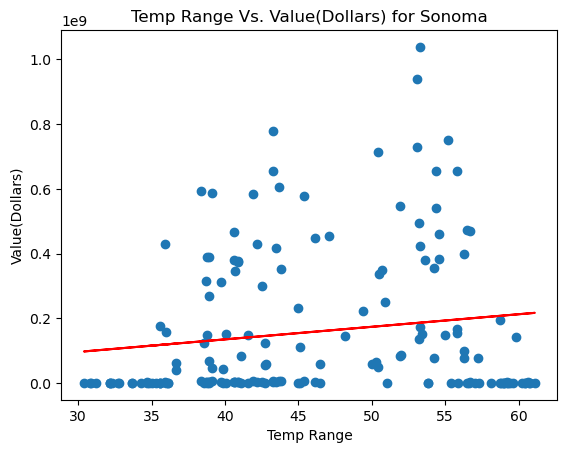

In [66]:
#Plot 

counties = merged_df["County"].unique()

for county in counties:

    for value in merged_df[['Min. Temp', 'Max. Temp',
       'Precip.', 'Temp Range']].columns: 

        for column in merged_df[['HarvestedAcres', 'Yield(Ton Per Acre)', 'Production',
            'Price(Dollars Per Ton)', 'Value(Dollars)']].columns:
           
    
            plot_linearregression(merged_df[value], merged_df[column], value, column, county, (0,0))



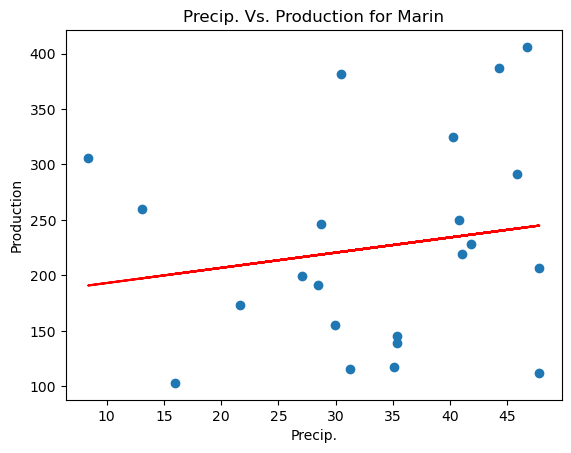

In [71]:
#manually do one lin regression graph to see issues arrising in for loop

x = merged_df[merged_df['County'] == 'Marin']['Precip.']
y = merged_df[merged_df['County'] == 'Marin']['Production']
plot_linearregression(x, y, 'Precip.', 'Production', 'Marin', (0,0))